In [1]:
!ls

datasheets			       labels.txt    outs
DocBank_samples			       LICENSE	     README.md
indexed_files			       Metrics.png   requirements.txt
info_extraction_experimentation.ipynb  MODEL_ZOO.md  scripts


In [ ]:
# additional steps such as 

In [ ]:
# currently experimenting with a single datashee, but can expand to multilple as required

In [3]:
import os
from PIL import Image

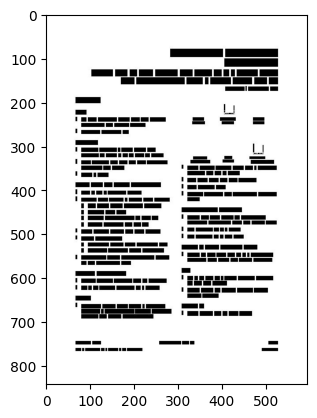

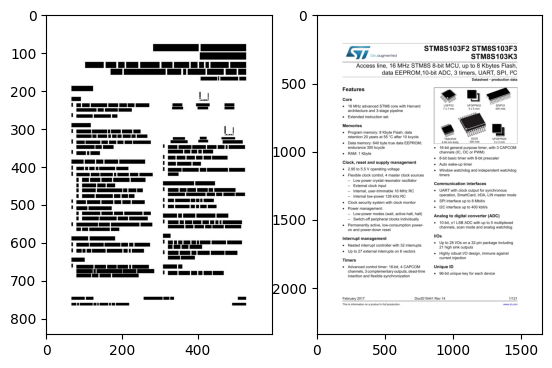

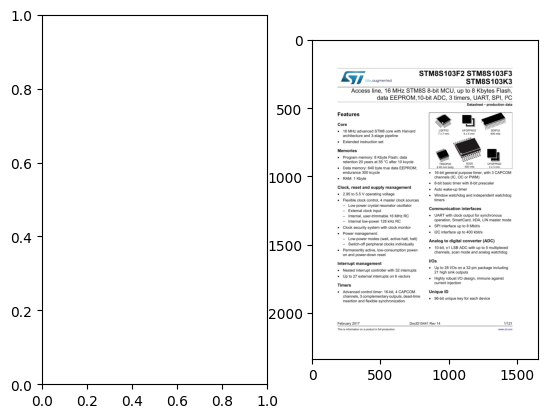

In [11]:
import matplotlib.pyplot as plt
# sample_file
page_num = 0
im_type = ["ann", "ori"]

base_dir = "outs"

for i, type in enumerate(im_type):
    file_path = f"sample_datasheet_{page_num}_{type}.jpg"
    im = Image.open(os.path.join(base_dir,file_path))
    plt.imshow(im)
    fig, ax = plt.subplots(1,2) 
    ax[i].imshow(im)

plt.show()

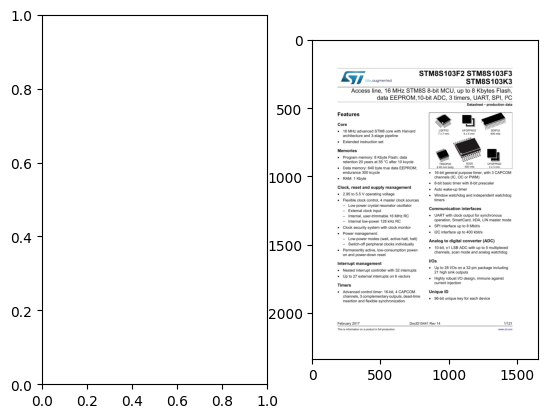

In [9]:
display(fig)

In [17]:
print(file_path)

sample_datasheet_0_['ann', 'ori'].jpg
